# CPSC 4970 AI + ML: Module 4 -- Logistic regression (classifier)

New stuff:
- [LogisticRegression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- [plot confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix)
- [metrics](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from IPython.core.display import display
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use("dark_background")


# Data from https://www.openml.org/d/31
# Data originally from https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)
# but the openml version is cleaned up a bit.
df = pd.read_csv('data/dataset_31_credit-g.csv')

In [180]:
ct = ColumnTransformer(
    [('one-hot', OneHotEncoder(), ['checking_status', 'credit_history', 'purpose',
                                  'savings_status', 'employment', 'personal_status',
                                  'other_parties', 'property_magnitude', 'other_payment_plans',
                                  'housing', 'job', 'own_telephone', 'foreign_worker'])],
    remainder='passthrough'
)

X = df.iloc[:, :-1]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

Training accuracy:  0.7946666666666666
Training precision:  0.8158783783783784
Confusion matrix:  [[113 109]
 [ 45 483]]


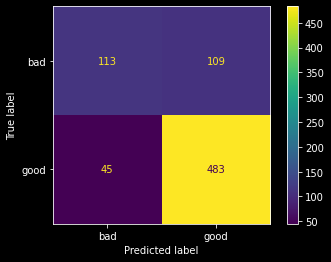

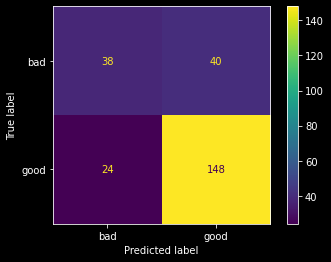

In [181]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, plot_confusion_matrix

lr = LogisticRegression(max_iter=1000).fit(X_train_transformed, y_train)
print("Training accuracy: ", accuracy_score(y_train, lr.predict(X_train_transformed)))
print("Training precision: ", precision_score(y_train, lr.predict(X_train_transformed), pos_label=lr.classes_[1]))
print("Confusion matrix: ", confusion_matrix(y_train, lr.predict(X_train_transformed)))
plot_confusion_matrix(lr, X_train_transformed, y_train)
plot_confusion_matrix(lr, X_test_transformed, y_test)